# Teoria del Caos

Antonio Estebanez Y Santos Saénz



### Indice




### 1. Sistemas Dinámicos
Los sistemas dinámicos se tratan de sistemas cuyos parámetros internos, los cuales se denominan variables de estado, siguen una serie de reglas temporales. Se denominan sistema ya que están conformados por un conjunto de ecuaciones y dinámicos debido a que sus variables de estado varían debido a alguna variable, generalmente el tiempo.

Segun el numero de variables de estado, tendremos la dimensión del modelo, en este caso la dimensión será n
    \begin{align}
            \dot{x_{0}} &= f_0 (x_0,  \cdots, x_n, t, a) \\
            &\vdots\\
    \dot{x_{n}} &= f_n (x_0,  \cdots, x_n, t, a)
        \end{align}
    
Los sistemas dinámicos estan compuestos por variables exógenas, estas son aquellas que afectan al sistema sin que este las provoque, y de variables endógenas, las cuales afectan al sistema pero este sí las provoca. 

Los sistemas dinámicos pueden dividirse en sistemas continuos, donde el tiempo varía continuamente, y sistemas discretos, donde el tiempo transcurre discretamente. Los sistemas dinámicos continuos se representan mediante ecuaciones diferenciales mientras que si el sistema es discreo se representa mediante ecuaciones de diferencias.

Ejemplo sistema discreto:
    \begin{align}
            {x_{t+1}} &= a_xt (1 - x_t) \\
            \
        \end{align}
Ejemplo sistema continuo:
\begin{align}
\frac{dx}{dt} &= a_x (1 - x) 
\end{align}

Por otra parte un sistema dinamico se puede definir como autónomo o no autónomo. Será autónomo si no depende explícitamente del tiempo.
Ejemplo sistema no autónomo:
\begin{align}
{\dot x} &= {F}({x},  t)
\end{align}
Ejemplo de sistema autónomo
\begin{align}
{\dot x} &= {F}({x})
\end{align}
Por último otra forma de clasificar un sistema dinámico es en sistemas lineales y no lineales. Sera lineal, si la función F que relaciona la tasa de incremento de las variables de estado con sus valores actuales cumple el principio de superposición, lo cual implica que 
\begin{align}
{f(x + y)} &= {f(x)} + {f(y)}
\end{align}

Los sistemas lineales son sencillos de analizar ya que aunque la solución del sistema este sujeta a condiciones complejas, este se puede simplificar a la suma de las soluciones del sistema para condiciones sencillas. Por lo tanto es usual poder encontrar soluciones análiticas para este tipo de sistemas.

Sin embargo si el sistema no cumple el sistema de ecuaciones anteriores y por lo tanto es no lineal, el analisis del sistema es más complejo. No se pueden encontrar soluciones analíticas al problema por lo que se tratará de analizar la representación de la dinámica del sistema mediante técnicas geométricas de visualización y análisis.

Por último es interesante destacar dentro del modelo el espacio de fase, el cual tiene una dimensión igual al numero de variables de estados cuya variación en función del tiempo determina el espacio de fases del sistema. Estas trayectorias no se pueden cruzar dadas unas condiciones iniciales diferentes según el teorema de existencia y unicidad.

Este teorema indica que para un modelo cuyas funciones $f_i$ y sus derivadas parciales sean continuas su solución existe y es única para unas condiciones iniciales dadas, siendo determinista

Un ejemplo de sistema dinamico lineal continuo es el siguiente, donde se modela el sistema $x = x_0 * cos(w*t)$. Este sistema es linear y por tanto para unas mismas condiciones iniciales tendrá siempre la misma solución y esta se puede hallar análiticamente o númericamente en ciertos casos, como se muestra en lo siguiente haciendo uso de Euler


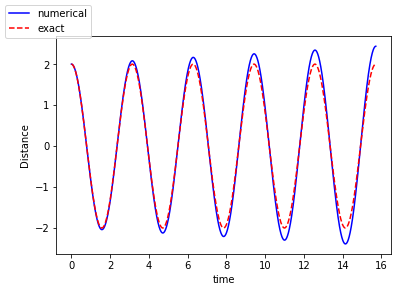

In [ ]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt
import numpy
# w es el omega value
omega = 2
# El periodo P es la diferencia entre dos picos
P = 2*pi/omega
# dt es tal que tiene 20 periodos entre picos
dt = P/500
T = 5*P # 5 implica simular 3 periodos de la función coseno
N_t = int(round(T/dt))
# t es el tiempo total de la simulación
t = linspace(0, N_t*dt, N_t+1)

u = zeros(N_t + 1)
v = zeros(N_t + 1)

# condiciones de frontera
X_0 = 2
u[0] = X_0
v[0] = 0

# Metodo de Euler
for n in range(N_t):
  u[n+1] = u[n] + dt*v[n]
  v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure()
l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1,l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('time')
plt.ylabel('Distance')
plt.show()

Este sería otro ejemplo de sistema dinámico linear. En este caso se va a simular las miles de revoluciones por minuto de un motor, variando los parámetros K y tau. Este sistema al ser dinámico linear es determinista y para ciertas condiciones iniciales tendrá una solución definida. Por otra parte al variar proporcionalmente poco las condiciones iniciales las soluciones serán ligeramente diferentes, al contrario de los sistemas no lineares donde para ligeros cambios en las condiciones iniciales las soluciones son radicalmente diferentes.

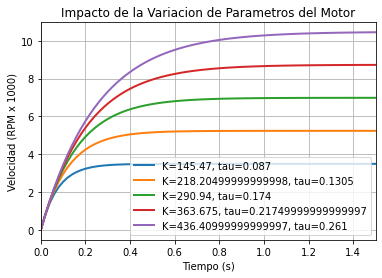

In [ ]:
import matplotlib.pyplot as plt

# Vectores de variacion de parametros
_K = [145.47 * (i / 2.) for i in range(2, 7)]
_tau = [0.087 * (i / 2.) for i in range(2, 7)]

ti = 0. # Tiempo inicial.
tf = 1.5 # Tiempo final.
ts = 0.02 # Tiempo de muestreo.

t = ti # Tiempo actual de simulacion.
Vin = 24 # Voltaje de entrada.
x = 0. # Velocidad inicial del motor.

_X = [[x] for _ in _K] # Vector de soluciones
_T = [[t] for _ in _K] # Vector de tiempo
# Leyendas
leg = []

for K, tau, X, T in zip(_K, _tau, _X, _T):
  x, t = X[0], T[0]
  # Asignar leyenda para distinguir grafico.
  leg.append('K={0}, tau={1}'.format(K, tau))
  while t < tf:
    dx =  (K * Vin - x) / tau
    x += dx * ts
    t += ts # Siguiente muestra de tiempo.
    X.append(x / 1000)
    T.append(t)
  plt.plot(T, X, linewidth = 2.)
plt.title('Impacto de la Variacion de Parametros en el Motor')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (RPM x 1000)')
plt.xlim([ti, tf])
plt.grid()
plt.legend(leg, loc='best')
plt.show()

###2. Dinámica no lineal y caos

Los sistemas no lineales representan sistemas donde no es posible expresar el comportamiento del mismo a partir de las sumas de los comportamientos de sus descriptores, es decir, las ecuaciones que representan la evolución del sistema no son lineales. Debido a la no linealidad de las ecuaciones, tampoco podemos descomponer el problema principal en subproblemas para obtener una solución mediante la suma.

Una ecuación lineal para un valor $u$ tiene la siguiente forma:<br>
 $Lu = 0$ 
<br><br>
Mientras que una ecuación no lineal tiene la siguiente:<br> 
 $F(u) = 0$

La teoría del caos estudia sistemas complejos y sistemas dinámicos no lineales que son muy sensibles a las condiciones iniciales, a pesar de esto, debemos tener en cuenta que estos sistemas siguen siendo deterministas, por lo que podemos predecirlos perfectamente si disponesmos de los datos necesarios.

Podemos definir el término caos como un comportamiento aperiódico en un sistema determinista que padece dependencia sensitiva de las condiciones iniciales.

A continuación comparamos un sistema lineal de un solo péndulo a un sistema no lineal de un péndulo doble.

### 2.1 Simulación sistema de péndulo simple

Un péndulo simple se defino como una párticula de masa $m$ suspendida del punto O por un hilo inextensible de longitud $l$ y de masa despreciable. Si desplazamos la partícla desde la posición de equilibrio hasta que el hilo forme un ángulo $\theta$ con la vertical, y luego la abandonamos partiendo del reposo, el péndulo oscilará bajo la acción de la gravedad.
El modelo matemático para el movimiento del péndulo es: <br>
$\ddot\theta$ + $(\frac{b}{m})$ · $\dot\theta$ + $(\frac{g}{L})$ ·  $sin(\theta)$ = 0
<br>
donde, <br>
$\ddot\theta$ es la aceleración angular<br>
$\dot\theta$ es la velocidad angular<br>
$\theta$ es el desplazamiento angular<br>
$b$ es el factor de rozamiento<br>
$g$ es la gravedad<br>
$L$ es la longitud del hilo<br>
$m$ es la masa de la párticula<br><br>
Operando con las ecuaciones<br>
$\theta_{1}$ = $\theta$<br>
$\theta_{2}$ = $\dot\theta$ = $\dot\theta_{1}$<br>
Deducimos<br>
$\dot\theta_{2}$ = $\ddot\theta$ = $\ddot\theta_{1}$<br><br>
Y obtenemos las ecuaciones<br>
$\dot\theta_{2}$ = $(-\frac{b}{m})$ · $\dot\theta_{2}$ + $(-\frac{g}{L})$·$sin(\theta_{1})$<br>
$\dot\theta_{1}$ = $\dot\theta_{2}$

A partir de las ecuaciones simulamos el comportamiento del sistema.


In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp

In [ ]:
# Valores iniciales de la simulación
start = 0
end = 20.4
step = 0.1
g = 9.81
L = 1       # Longitud de la cuerda del péndulo
L2 = 0.8    # Longitud de la cuerda del péndulo 2
fr = 0      # Factor de rozamiento 
m = 1       # Masa del péndulo

def sim_pen_eq(t, theta):
    dtheta2_dt = (-fr/m)*theta[1] + (-g/L)*np.sin(theta[0])
    dtheta1_dt = theta[1]
    return [dtheta1_dt, dtheta2_dt]

def sim_pen_eq2(t, theta):
    dtheta2_dt = (-fr/m)*theta[1] + (-g/L2)*np.sin(theta[0])
    dtheta1_dt = theta[1]
    return [dtheta1_dt, dtheta2_dt]

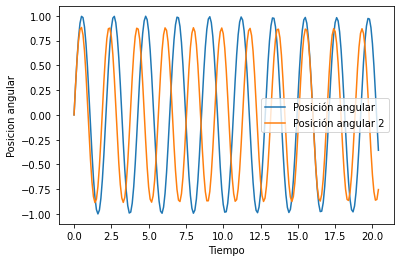

In [ ]:
# Simulación
theta1_ini = 0      # Posición angular inicial
theta2_ini = 3      # Velocidad angular inicial
theta_ini = [theta1_ini, theta2_ini]
times_array = [start, end + step]
t = np.arange(start, end + step, step)
num_points = len(t)
l = np.arange(0, num_points, 1)

theta12 = solve_ivp(sim_pen_eq, times_array, theta_ini, t_eval = t)
theta1 = theta12.y[0,:]
theta2 = theta12.y[1,:]
theta12_2 = solve_ivp(sim_pen_eq2, times_array, theta_ini, t_eval = t)
theta1_2 = theta12_2.y[0,:]
theta2_2 = theta12_2.y[1,:]

plt.plot(t, theta1, label= "Posición angular")
plt.plot(t, theta1_2, label= "Posición angular 2")
plt.xlabel("Tiempo")
plt.ylabel("Posicion angular")
plt.legend()
plt.show()

En la gráfica se muestra la posición angular del péndulo con respecto al tiempo, y podemos observar que una pequeña variación en la longitud del hilo, hace variar los resultados aunque de manera leve.
Ahora comprobemos lo mismo pero en el sistema del péndulo doble.

In [ ]:
G = 9.8   # Gravedad
L1 = 1.0  # longitud hilo 1
L2 = 1.0  # longitud hilo 2
M1 = 1.0  # masa péndulo 1
M2 = 1.0  # masa péndulo 2

In [ ]:
def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx


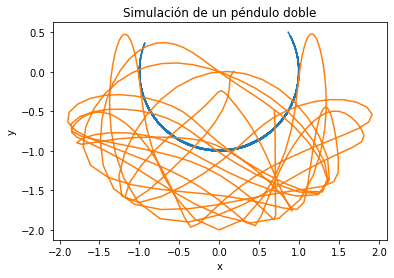

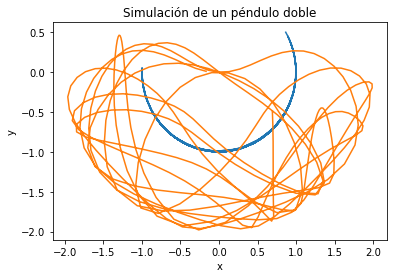

In [ ]:
dt = 0.05
t = np.arange(0, 20, dt)

# th1 y th2 son los ángulos iniciales
# w10 y w20 son las velocidades angulares iniciales (reposo)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0
th1_2 = 120.001

# estado inicial
state = np.radians([th1, w1, th2, w2])

y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("Simulación de un péndulo doble")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# estado inicial 2
state = np.radians([th1_2, w1, th2, w2])

y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("Simulación de un péndulo doble")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

En esta simulación, las gráficas representan la trayectoria de las dos masas en el plano. Vemos que una simple variación de 0.001º en el ángulo inicial de uno de sus péndulos, provoca que las trayectorias sean completamente diferentes.

###3. Caos determinista

###3.1 Ecuaciones de Lorenz
Edward Lorenz fue un matemático y metereorólogo pionero en el desarrollo de la teoría del caos.
Podemos estudiar el caos con las escuaciones de Lorenz<br>
$\dot x = \sigma(y - x)$ <br>
$\dot y = rx - y -xz$<br>
$\dot z = xy - bz$<br>
Donde $\sigma, r, b > 0$ son parámetros.
Lorenz derivó este sistema tridimensional a partir de una simplificación de la convección atmosférica.
El sistema tiene solo dos no linealidades, que son los términos quadráticos $xy$ y $xz$.

###3.1.1 El efecto mariposa
En teoría del caos, el efecto mariposa es la dependencia sensitiva a las condiciones iniciales donde una pequeña variación en uno de los estados de un sistema determinista no lineal resulta en diferencias a gran escala a medida que avanza el sistema.

El término fue creado por el matemático Edward Lorenz, lo llamó así debido a la metáfora de que el aleteo de una mariposa en determinado punto del planeta, podía causar un tornado en otro determinado lugar, pasado cierto tiempo. 

A partir de las ecuaciones de Lorenz, podemos simular un sistema caótico sensible a las condiciones iniciales.

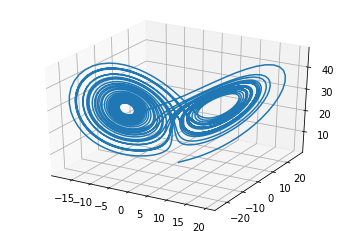

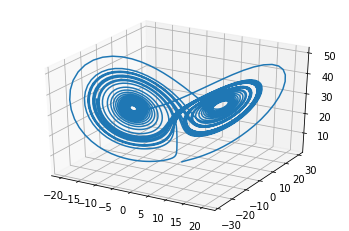

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
rho2 = 30.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Desempaqueta el vector de estado
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas

def f_2(state, t):
    x, y, z = state  # Desempaqueta el vector de estado
    return sigma * (y - x), x * (rho2 - z) - y, x * y - beta * z  # Derivadas

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)
states2 = odeint(f_2, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states2[:, 0], states2[:, 1], states2[:, 2])
plt.show()

Las soluciones a las ecuaciones de Lorenz nunca se establecen en un punto de equilibrio o en un estado periódico, en vez de eso, continuan oscilando de forma irregular y aperiódica. Simulando el comportamiento de las ecuaciones, sucede lo mismo que con el ejemplo anterior de péndulo doble, una pequeña variación de los valores iniciales supone un comportamiento completamente distinto, aunque determinista.
Sin embargo, Lorenz también demostró que existía estructura en el caos, por eso podemos ver que a pesar de tener comportamientos distintos, ambas simulaciones tienen forma de mariposa.

###3.2 Atractores
Un atractor es un conjunto de valores hacia los cuales un sistema tiene a evolucionar, es decir, aunque tengamos un sistema dinámico caótico, podremos saber su estructura aproximada si conocemos su atractor.
Un atractor puede ser un punto, una curva, una variedad o un conjunto de estructuras fractales, que es el caso del atractor resultante de aplicar las ecuaciones de Lorenz.

En un sistema dinámico, uun atractor Λ es un subconjunto del espacio de fases tal que: <br>
- Existe un entorno de Λ, llamado cuenca de atracción, al que converge cualquier sistema abierto que contenga Λ.
- $f(t,$Λ$)$⊃Λ para $t$ suficientemente grande.
<br>

Además del atractor extraño o de Lorenz ya visto, existen otros tipos como por ejemplo: 
- Atractor de punto fijo
- Atractor de infinitos puntos fijos
- Atractor de toroide límite
- Atractor de ciclo límite

### 3.3 Fractales

### 3.3.1 Introducción

En 1963, se halló que para las ecuaciones de Lorenz la solución se trataba de un conjunto complicado del espacio de fases. Este conjunto se trata de un atractor con una geometría muy particular, el fractal.

Un fractal es un objeto geométrico cuya estructura básica, fragmentada o aparentemente irregular, se repite a diferentes escalas. Muchas estructuras naturales son de tipo fractal, como en el brécol, las montañas o las nubes. La propiedad matemática clave de un objeto genuinamente fractal es que su dimensión métrica fractal es un número racional mayor a su dimensión topológica.

A continuación se van a explicar y simular algunos de los fractales más simples y explicar varias nociones de la dimensión fractal.

### 3.3.2 Conjuntos de infinitos elementos

Para las explicaciones de fractales de más adelante es precios antes explicar unas nociones acerca de conjuntos. 

Esta demostrado que existen unos infinitos más largos que otros y a finales del siglo XIX George Cantor inventó unas inteligentes formas de comparar diferentes conjuntos de infinitos elementos.

Por una parte dos conjuntos de infinitos elementos tienen la misma cardinalidad si para cada elemento x perteneciente al conjunto $X$, existe un único elemento y del conjunto $Y$. Se trata de una correspondencia uno a uno.

Por otra parte partiendo del conjunto de numero naturales $N$ = {1, 2, 3, 4, 5, …}, si un conjunto $X$ puede establecer una relación uno a uno de sus elementos con el conjunto de números naturales $N$, entonces se dice que $X$ es contable, sino se dice que $X$ es incontable.

(EXPLICAR LOS 4 EJEMPLOS)

### 3.3.3 Conjunto Cantor

El conjunto cantor se trata de un fractal íntimamente relacionado a la geometría de los atractores extraños. Partimos de un intervalo cerrado $S_0$ = [0, 1] del cual eliminamos el segundo tercio del intervalo (1/3, 2/3) Esto produce dos intervalos cerrados en $S_1$. Cuando eliminamos el segundo tercio del intervalo abierto de cada uno de estos dos intervalos cerrados se produce $S_2$. El conjunto $C$ = $S_ \infty$ se trata del conjunto Cantor. Para ayudar a su visualización se muestra la siguiente simulación.


In [ ]:
# Imprime un conjunto cantor especificando el numero de interacciones, el caracter
# a imprimir y el Sx desde el que se deasea imprimir.

def cantorSet(N, caracter, Sx):  # Funcion para la impresión de un conjunto cantor
    line = ""     # Linea a imprimir
    if (N == 0):  # Caso base
        return()
    else:

        if(Sx == 0):  # Imprime la linea inicial donde no hay espacio en blanco y la segunda linea
            print(caracter*3**N)
            print(caracter*int((3**N)/3)+' '*(int((3**N)/3)-2)+ '  ' + caracter*int((3**N)/3))

        else:
            line = caracter*3**(N-1) + ' '*3**(N-1) + caracter*3**(N-1)
            for i in range(Sx):
                line+=' '*len(line) + line

            print(line)
    return cantorSet(N-1,caracter,Sx+1)  # Llamada recursiva

iteraciones = int(5)
caracter = '*'
Sx = 0
cantorSet(iteraciones,caracter, Sx) # Llamada a la funcion de impresion del conjunto cantor

***************************************************************************************************************************************************************************************************************************************************
*********************************************************************************                                                                                 *********************************************************************************
***************************                           ***************************                                                                                 ***************************                           ***************************
*********         *********                           *********         *********                                                                                 *********         *********                           *********         *********
***   ***         ***   

()

El conjunto cantor tiene una serie de propiedades que son típicas de fractales:
 * A pequeñas escalas tiene una estructura arbitraria al igual que ocurre a gran escala. Si aumentamos el número de iteracciones aumentando el Sx, se sigue produciendo el patrón de eliminar el intervalo (1/3, 2/3) de cada conjunto cerrado del Sx-1 en Sx, produciéndose una estructura que nunca termina.
 * Observamos que la imagen del conjunto de Cantor por la homotecia de centro 0 y razón 1/3 es una parte del propio conjunto de Cantor. Esto es una manifestación de autosimilaridad, que es una de las propiedades básicas de algunos fractales.
 * La dimensión no es un entero, se trata de $ln2/ln3 = 0.63$ como se explicará más adelante.

Por otra parte tiene un conjunto de propiedades propias, que no se extienden al resto de fractales como son:
 * La medida. El intervalo inicial $[0,1]$ mide 1, y a cada paso, se le quita un tercio, lo que hace que su longitud se multiplique por 2/3. la sucesión geométrica $u_n = (2/3)^n$ tiende hacia cero. Por lo tanto el conjunto de Cantor es de medida nula. Esto implica, en particular, que el conjunto de Cantor no puede contener ningún intervalo de medida no nula.
 * Es incontable. Esto se explica a través del argumento de la diagonal de Cantor. Supongamos que existiera una lista de todos los puntos en $C$, {${c_1, c_2, c_3, c_4, ...}$}. Para demostrar que $C$ es incontable debemos tener un punto $p$ que pertenece a $C$ pero no a la lista. Denotamos $cij$ al digito numero j de la base 3 de $ci$. Por otra parte denotamos $p = p11p22p33..$ Si $cnn=0$ entonces $pnn=2$, y si $cnn=2$ entonces $pnn=0$. Tenemos que $p$ pertence a $C$ al estar escrito con solo $0_s$ y $2_s$, pero no a la lista ya que difiere de $c_n$ para el n digito. Esto contradice la idea de que la lista esta completa, por lo que $C$ es incontable.

### 3.4 Dimensión de fractales autosimilares

El calculo de la dimensión para un conjunto de puntos de objetos geométricos familiares es sencillo. Para una linea o una curva diríamos que tiene una dimensión, para planos o superficies planas diríamos que se tratan de objetos de dos dimensiones, para solidos diríamos que se tratan de objetos de 3 dimensiones, y así sucesivamente. Como aproximación se puede definir que la dimensión de un objeto es el mínimo número de coordenadas que se precisan para describir cada punto de este.

Sin embargo cuando tratamos de aplicar está definición a fractales nos encontramos con ciertos problemas, esto se ve con claridad cuando se trata de calcular la dimensión de la curva de von Koch.La curva de von Koch se generá a partir de un segmento $S_0$. A partir de este se genera el segmento $S_1$ eliminando el segundo tercio del segmento de $S_0$ y reemplazandolo por dos lados de un triángulo equilatero. La curva se va generando recursivamente aplicando lo anterior a cada segmento de la nueva curva que se va generando. Es decir se genera $S_n$ remplazando cada uno de los segmentos de $S_n-1$ por dos lados de un triángulo equilatero. Y cuando se lleva a $S_\infty$, este límite se trata de la curva de von Koch. Adelante se muestra una simulación para la generación de la curva.

In [ ]:
!pip3 install ColabTurtle
from ColabTurtle.Turtle import *
import ColabTurtle.Turtle as turtle
turtle.initializeTurtle()

def von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo):

  if iteraciones == 0:
    turtle.forward(tamanio)
  else:
    iteraciones = iteraciones - 1
    tamanio = tamanio / factor_reduccion

    von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo)
    turtle.left(angulo)
    von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo)
    turtle.right(angulo * 2)
    von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo)
    turtle.left(angulo)
    von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo)

turtle.hideturtle()

iteraciones = 4
tamanio = 200
angulo = 60
factor_reduccion = 3

for i in range(3):
  von_Koch(turtle, iteraciones, tamanio, factor_reduccion, angulo)
  turtle.right(120)


Al dilucidar cual es la dimension de la curva de von Koch es cuando nos encontramos con una paradoja. A priori al ser una curva se podría pensar que tiene pues dimension uno, pero esto no es asi debido a que la curva de von Koch tiene una longitud de tamaño infinito. 

Esto es así debio a que $S_0$, tiene una longitud $L_0$. Pero $S_1$ tendrá una longitud 4/3 $L_0$ debido a que contiene los dos segmentos de $S_0$ salvo uno del que se obtienen dos segmentos del triangulo equilatero de la misma longitud que el que se quita. Por tanto $L_n = (4/3)^n$ que llevando n a infinito da lugar a que $L_\infty = \infty$ 

Esto sugiere que la curva tiene mas de una dimensión, aunque ciertamente no tiene área, por lo que se deduce que está entre una y dos dimensiones.

Los fractales como se ha explicado están compuesto por copias autosimilares de si mismos pudiendo llegar hasta una dimension definida de reducción para esos fractales. Supongamos un fractal que se trata de cuadrados reducidos para un factor de reduccion dos en todas sus direcciones. EL primer cuadrado se habría reducido en cuatro cuadrados. Si para el cuadrado reducimos en cada direccion por un factor 3 obtenemos 9 cuadrados distintos. Parece que para un factor $r$ se obtienen $r^2$ cuadrados diferentes.

Sin embargo ahora aplicando esto a un cubo, si dividimos en todas sus direcciones por un factor de 2 en todas sus direcciones obtenemos 8 cubos distintos, y si dividimos por un factor de 3 obtenemos 27 cubos distintos. Por lo que a partir de una razón $r$ parece que se obtienen $r^3$ cubos distintos.

Estos exponentes no son casualidad y se tratan de la dimension de los objetos con los que se está trabajando. Se deduce que $m = r^d$, a partir de lo que la dimension se obtiene de la siguiente manera $d = ln(m)/ln(r)$

Para el conjunto Cantor, al tratarse de una figura que se divide su segmento a razón 3 de la que se obtienen 2 segmentos, su dimension es la siguiente $d = ln(2)/ln(3) = 0,66$

Para la curva de von Koch, al tratarse de una figura que se divide a razón 3 su segmento del cual se obtienen cuatro segmentos, dos del semento y dos correspondientes a los lados del triángulo equilátero, su dimensión es la siguiente $d = ln(4)/ln(3) = 1,26$

### 3.5 Dimensión de fractales no autosimilares

Para lidiar con fractales no autosimilares se han propuesto diferentes técnicas, y todas ellas comparten la idea de medir a una escala $ϵ$. La idea será medir los puntos de un conjunto de manera que se ignoren irregularidades de tamaño menor que $ϵ$ y entonces estudiar las medidas cuando $ϵ$ tiende a 0.

Para el cálculo de la dimensión, se va a utilizar lo conocido como Box Dimension, un tipo de medida que trata de cubir el conjunto de puntos con cuadrados de tamaño de lado $ϵ$. Vamos a tener que $N(ϵ) = L/ϵ$, siendo $N(ϵ)$ el conjunto de cuadrados necesarios para cubrir el conjunto de puntos y $L$ la longitud de una curva de dimension 2. En el caso de planos y superficies planas la fórmula será $N(ϵ) = A/ϵ^2$. Si pasamos a objetos del mundo real, $N(ϵ) = V/ϵ^3$. 

Como se puede observar la dimension del conjunto de puntos se corresponde al exponente de $ϵ$, obteniendose la ley de potencial que define $N(ϵ) = 1/ϵ^d$.
Esto define la dimension de box como sigue $d = \lim_ϵ \rightarrow \infty   (ln(N(ϵ)) / ln(1/ϵ))$

A continuación se mostrará una simulación del calcula de la dimensión fractal para una imagen correspondiente a una angiografía de una mácula de un ojo. Para ello en primer lugar leeremos una imagen de 1176 pixeles, cuyos valores binarizaremos, transormando el valor de los pixeles de los vasos sanguineos de color cercano a negro a valor 0, que es el valor correspondiente al negro, y del resto de pixeles a valor entero 255, que es el correspondiente al blanco.

Una vez hecho esto se aplicará Box, calculandose la dimension contando el nunmero de pixeles que estan en negro, y dividiendo el logaritmo neperiano de ese valor entre el logaritmo neperiano de $ln(1/ϵ)$ que se corresponde a  $ln(1176)$ ya que $ϵ = 1 / 1176$ 

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import math as math
from pylab import *
import pandas as pd

La imagen es la que se encuentra a continuación, como se puede ver tiene diferentes tonos de colores. La binarizaremos dejandola en color blanco y negro, siendo negro el de los vasos sanguineos, por ello los colores cercanos a valor 255 (blanco), se pasarán a color negro. 

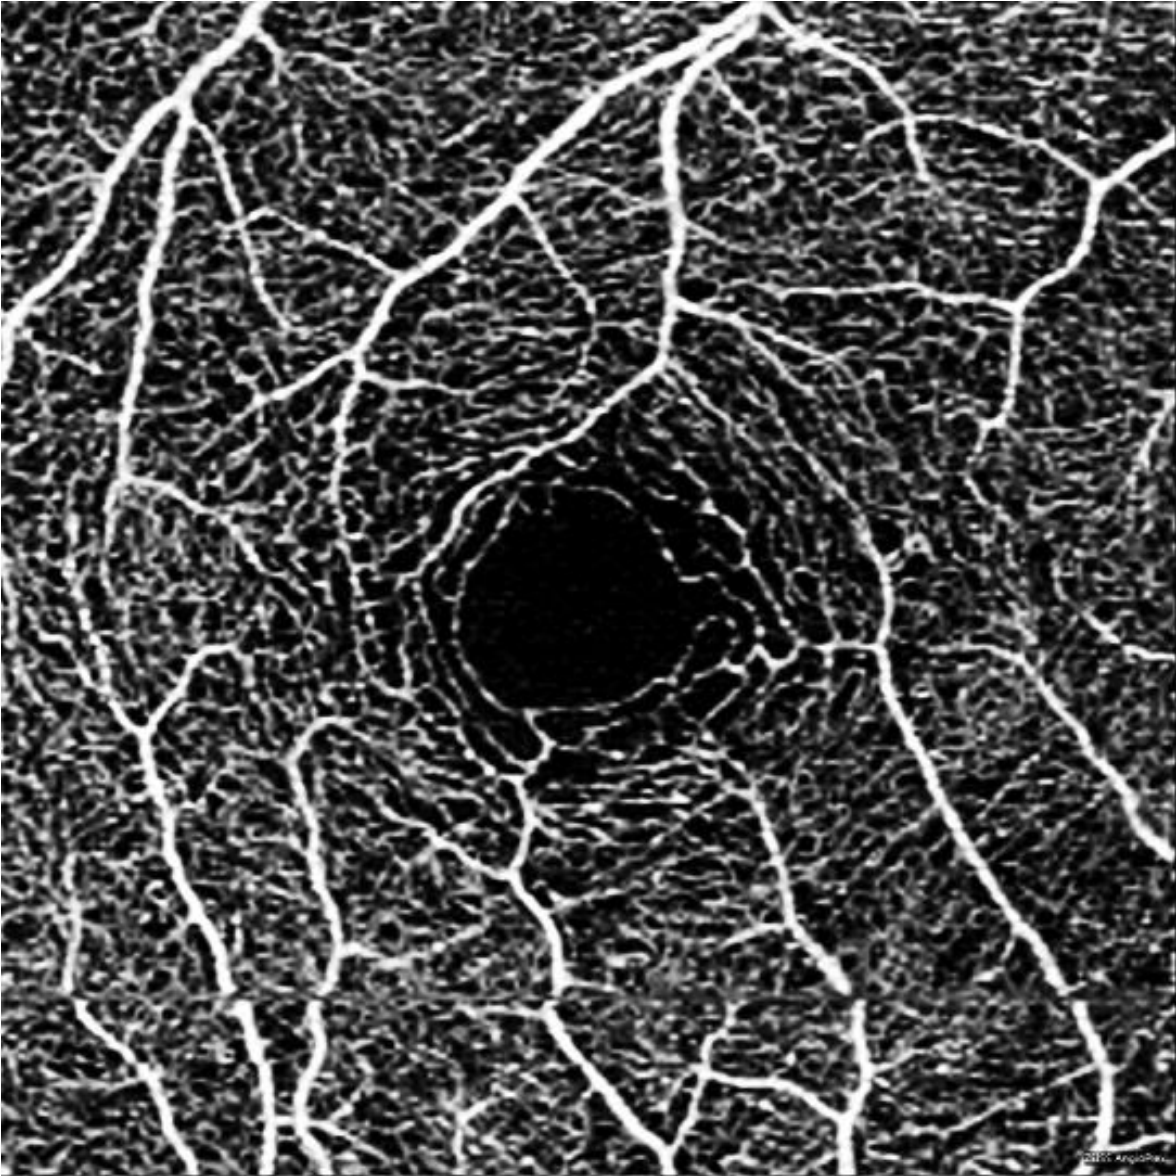

In [ ]:
Image.open('microvascularización_macula.png')

In [ ]:
im = np.array(Image.open('microvascularización_macula.png').convert('L'))
im_bin2 =  (im < 192) * 255
im_bin = np.zeros((1176, 1176))
for i in range (0, 1176):
    for j in range(0, 1176):
        im_bin[i, j]=im_bin2[i, j]
Image.fromarray(np.uint8(im_bin)).save('mv1.png')


A continuación se muestra como ha quedado la imagen binarizada.

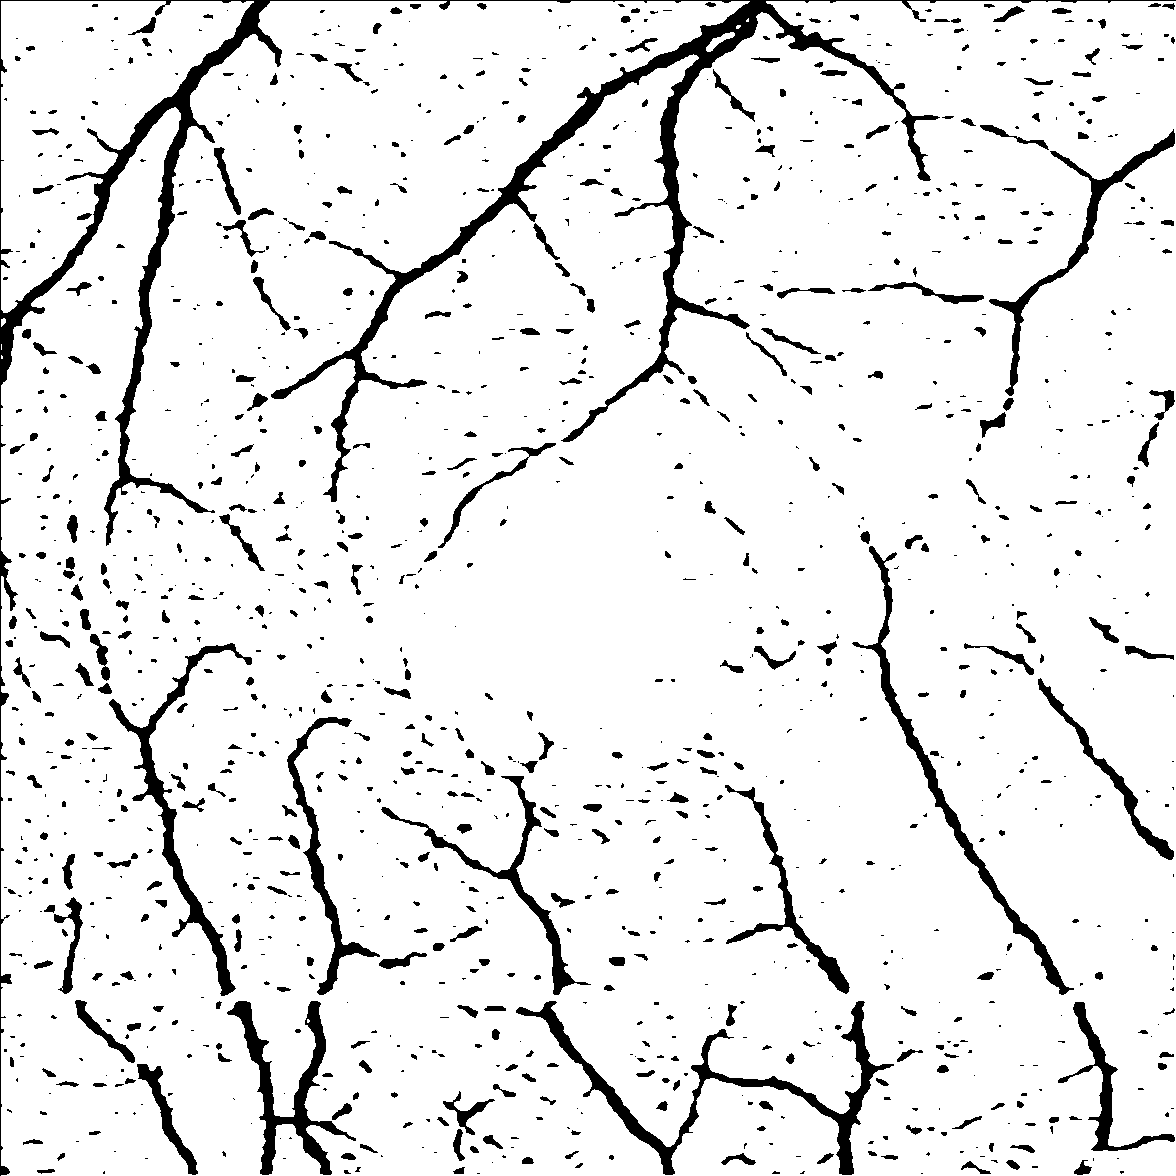

In [ ]:
binarized = Image.open('mv1.png')
binarized

Ahora la idea será aplicar box, dividiendo la imagen en todos los cuadros que podamos. Una primera aproximación sería dividirla en 4 cuadros como se muestra aqui.

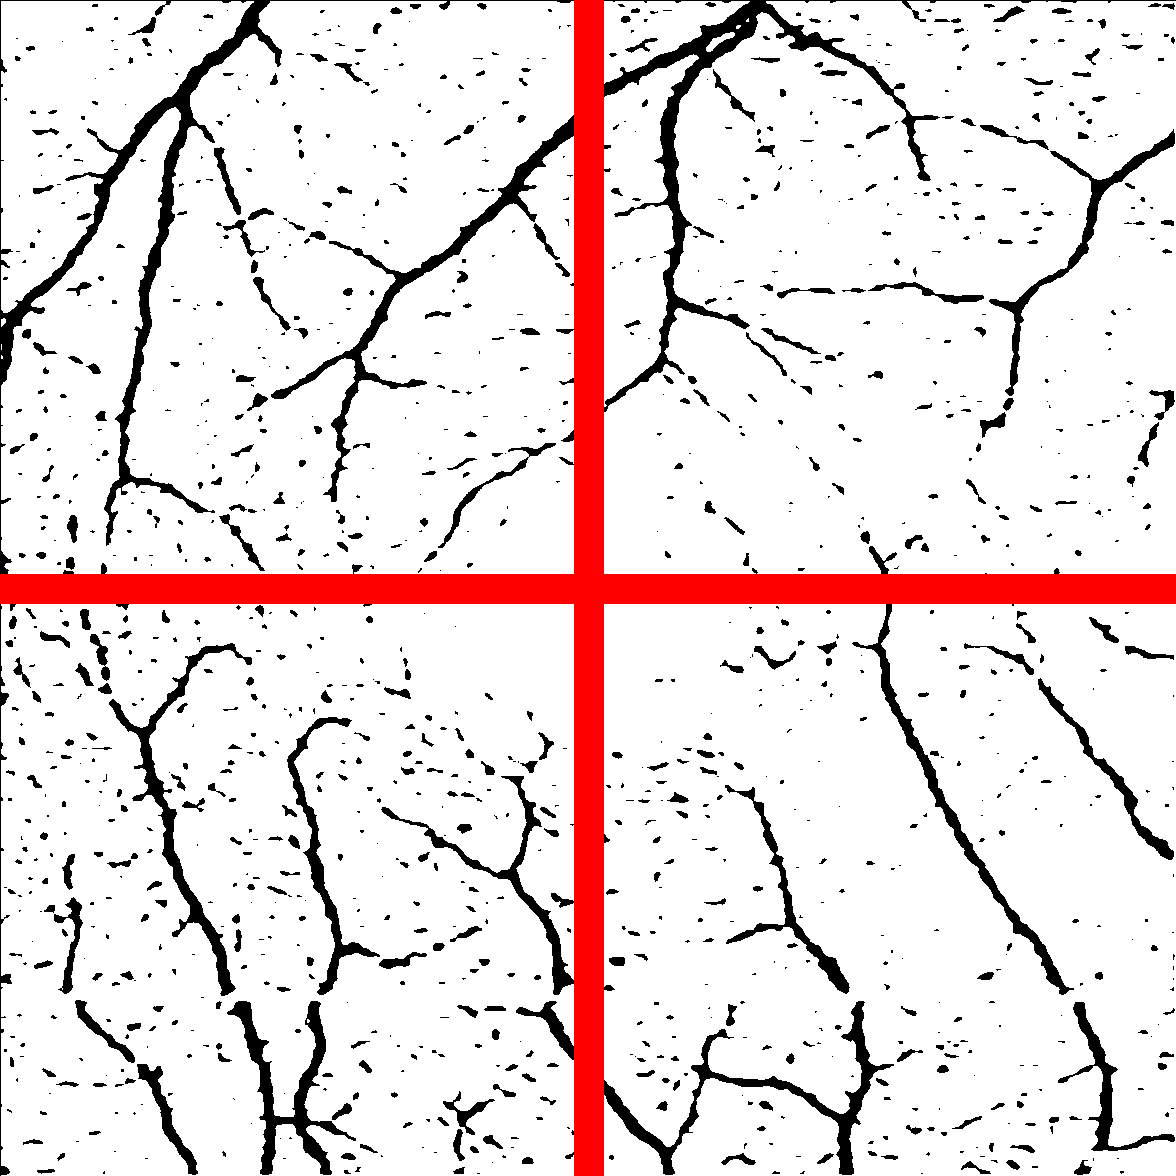

In [ ]:
boxes4 = binarized.convert('RGB')
aux = ImageDraw.Draw(boxes4)
aux.line([(588, 0), (588, 1176)] , fill ='red', width = 30) 
aux.line([(0, 588), (1176, 588)] , fill ='red', width = 30) 
boxes4

Se podría ser más precisos ya que el calculo se hace cuando el tamaño de el lado del cuadrado tiende a 0, es decir cuántos mas cuadrados puedan dividir la imagen, y se nos ocurriría mejorar a 16 cuadros.

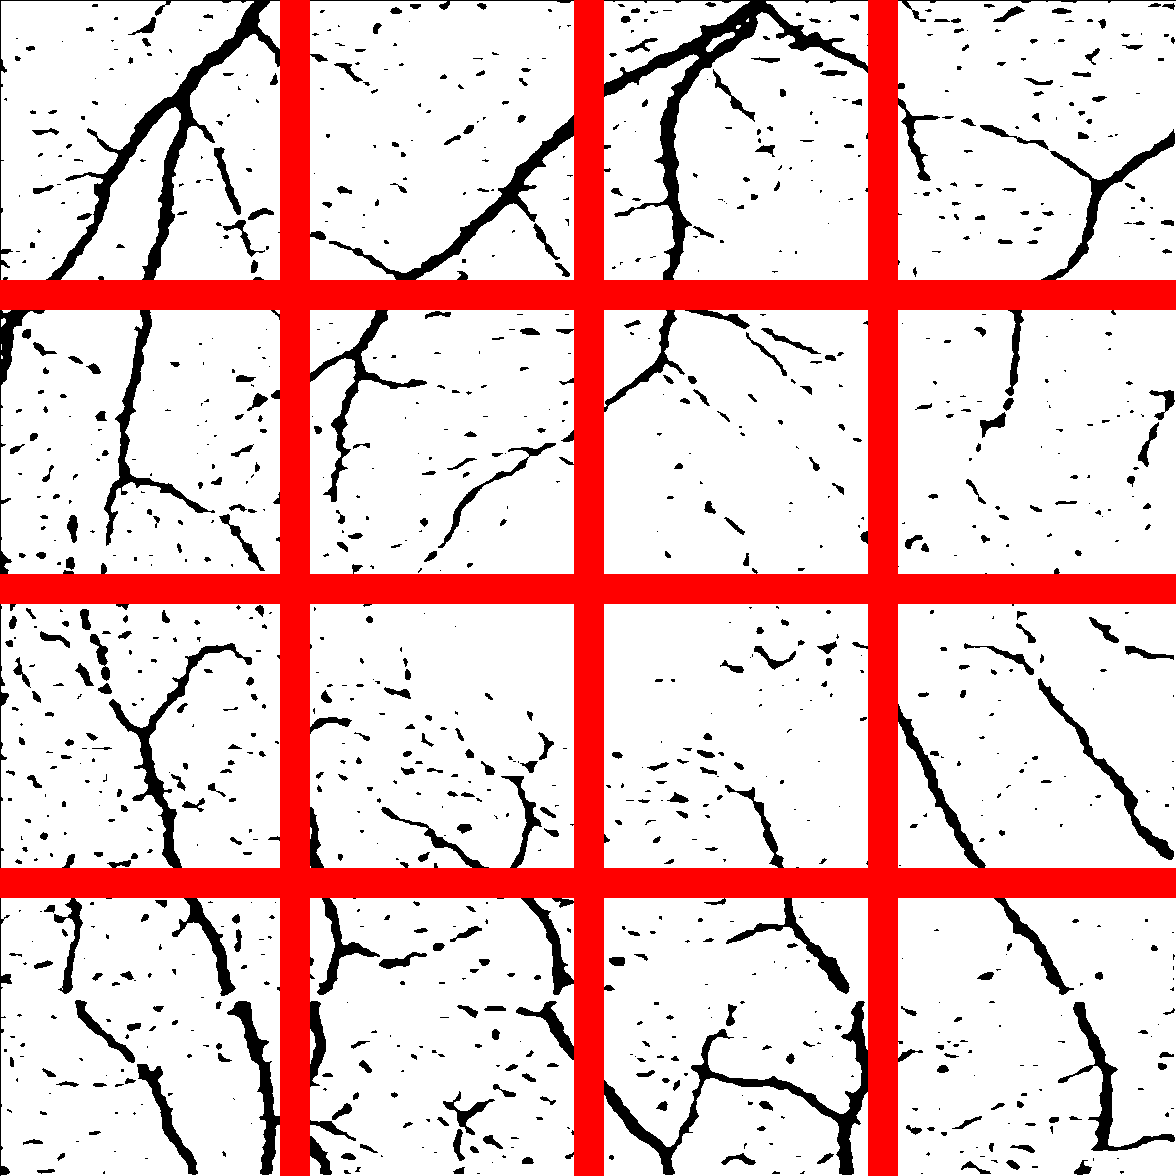

In [ ]:
x = np.arange(294, 1176, 294)
boxes16 = binarized.convert('RGB')
aux = ImageDraw.Draw(boxes16)
for i in x: 
    aux.line([(i, 0), (i, 1176)] , fill ='red', width = 30)
for i in x: 
    aux.line([(0, i), (1176, i)] , fill ='red', width = 30) 
boxes16

Debido a que la imagen tiene 1176 pixeles, como mucho podremos dividirla entre 1176 * 1176 cuadros, por lo que el calculo de la dimensión de box procedería de la siguiente manera. Se hallará el total de pixeles con valor 0, negro para aplicar la formula del cálculo de la dimensión con Box.

In [ ]:
counter = 0
for i in range (0, 1176):
    for j in range (0, 1176):
        if(im_bin[i, j]==0):
            counter = counter + 1
d = np.log(counter)/np.log(1176)
print("La dimensión fractal es: " + str(d))

La dimensión fractal es: 1.6485033867352539


Si quisieramos calcular la dimension con Box del conjunto Cantor tendríamos que el conjunto $S_n$ se conforma por $2^n$ segmentos de longitud $(1/3)^n$. Por ello para cubir el conjunto cantor necesitaríamos segmentos de longitud $ϵ = (1/3)^n$ para cubrir la totalidad de la longitud del segmento, y se necesitaría que $N = 2^n$ para cubir los $2^n$ segmentos. Aproximando $ϵ$ a 0, y $n$ a infinito quedaría que $d = ln(N(ϵ)) / ln(1/ϵ) = ln(2^n) / ln(3^n) = (n*ln(2)) / (n*ln(3)) = ln(2) / ln(3)$

Este valor se corresponde con el valor de la dimensión obtenido también por el método de fractores autosimilares.

Acerca del método de Box en último lugar cabe decir que es dificil hallar una cobertura del valor que puede ser aceptable para $ϵ$. Su compurtación por otra parte es muy compleja y requiere de mucha memoria, al menos comparandolo con otros métodos para el calculo de la dimensión fractal. Por otra parte sufre de algunos inconvenientes como es que para un conjunto de puntos con dimensión entre 0 y 1, su dimensión de Box es 1, aunque sea un conjunto limitado.

### 3.6 Pointwise and Correlation Dimensions

Dado un sistema caótico que se asienta en un atractor en el espacio de fases, este típicamente va a tener una microestructura fractal. Para estimar su dimensión fractal habría que generar una series de puntos dejando que el atractor evolucione con el tiempo y a partir de aquí computar su dimension con Box. Sin embargo como se ha explicado computacionalmente sería muy costoso y se comporta incorrectamente para un conjunto de puntos en un espacio de dos dimensiones. 

Existe una técnica más eficiente que se trata de la propuesta por Grassberger and Procaccia. Se trata de fijar un punto $x$ en el atractor $A$. Se denota $N(ϵ)$ como el conjunto de puntos que entran dentro del circulo con centro en $x$ y de raio $ϵ$. A medida que $ϵ$ aumente el numero de puntos dentro del circulo aumentara según la siguiente ley potencial.

$N_x(ϵ) = ϵ^d$

A $d$ se le denota como pointwise dimension en $x$. Esta dimensión depende significativamente del punto $x$ por lo que para tener una dimensión global del atractor A, correlation dimension, hay que calcula una media de $N_x(ϵ)$ para varios $x$.

$C(ϵ) = ϵ^d$

Para estimar $d$ habría que hallar la pendiente de la grafica generada por $lnC$, y $lnϵ$. La ley potencial solo se sostiene para valores intermedios de $ϵ$, ahi se generará una linea recta correspondiente a la pendiente buscada.

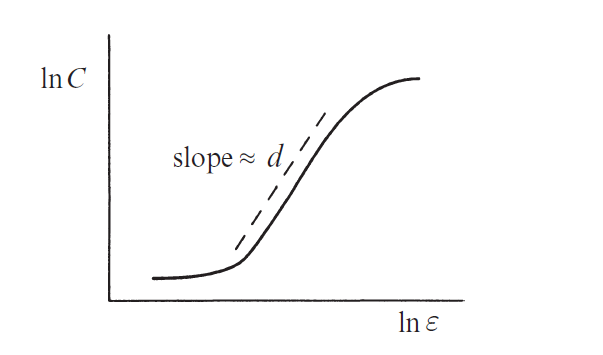


A continuacion se va a mostrar una simulación donde para un conjunto de puntos se calculara su dimensión a través del calculo de la dimension por correlación.

Se comenzará leyendo los punto a partir de un fichero llamado valores_x_y con valores correspondientes en su primera columna correspondientes a las $x$ de los puntos, y valores en su segunda columna correspondientes a las $y$ de los puntos. 

Se partirá de una distancia base $ϵ$ de valor 2000 que se irá incrementando a razon 1.05 hasta alcanzar el valor 10000. Para la distancia en cuestión se recorrerán uno a uno todos los puntos, y para el punto que se este recorriendo se calculará la distancia euclidea respecto del resto de puntos. Si esta distancia euclidea es menor que el valor $ϵ$, se contabilizará en la variable corrint. Al final de la iteraccion para cada incremento del valor $ϵ$, se guardará el $ln(ϵ)$ y el $ln$ del conjunto de puntos que se han obtenido dentro del rango $ϵ$, es decir siendo su distancia euclidea menor que $ϵ$, obteniendo además la media ya que se calculo que puntos entraban dentro del radio $ϵ$, pero desde cada punto.

              x           y
0    1717308.18  4751090.61
1    1714309.33  4751774.23
2    1717901.19  4752359.02
3    1662259.00  4876271.00
4    1619487.00  4843410.00
..          ...         ...
351  1657615.05  4849767.79
352  1675662.51  4845473.86
353  1650726.60  4807744.48
354  1648864.27  4809325.35
355  1724022.27  4846134.69

[356 rows x 2 columns]


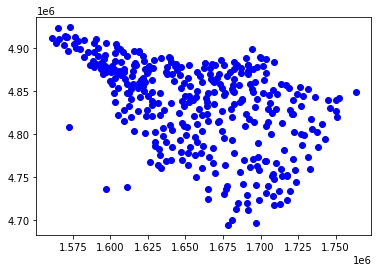

In [ ]:
# Impresión del conjunto de puntos a calcular su dimensión de correlación
import pandas as pd
df = pd.read_excel('valores_x_y.xlsx')
print(df)
xs = df['x']
ys = df['y']
plt.plot(xs, ys, 'o', color='blue')

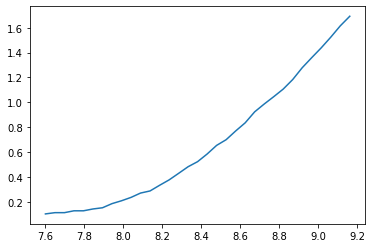

In [ ]:
import numpy as np

# Funcion para el calculo de la distancia euclidea
def edistance(ics1, ipsilon1, ics2, ipsilon2):
	edist = np.sqrt((ics1-ics2)*(ics1-ics2) + (ipsilon1-ipsilon2)*(ipsilon1-ipsilon2))
	return edist

def heaviside(arg):
  if (arg <= 0):  
	  return 0
  else:
    return 1

MAXR = 10000  # Valor ϵ máximo
MINR = 2000   # Valor ϵ mínimo
INCR = 1.05   # Razon incremento valor ϵ en cada iteracción

valor_y = []  # Litsa con el conjunto de valores ln(C) 
valor_x = []  # Lista con el conjunto de valores ln(ϵ)
npoint = df.shape[0] # Numero total de puntos

r = MINR
while (r<=MAXR):
  corrint = 0
  for i in range (0, npoint):
    xx1 = df['x'][i]
    yy1 = df['y'][i]
    for j in range (0, npoint):
      xx2 = df['x'][j]
      yy2 = df['y'][j]
      temp = heaviside(r-edistance(xx1,yy1,xx2,yy2))
      corrint = corrint + temp;

  valor_x.append(np.log(r))
  valor_y.append(np.log(corrint/(npoint-1))) # Se divide entre el total de puntos y ya que se 
  r = r*INCR                                 # calculo la N de cada punto, y queremos C, la media

plt.plot(valor_x, valor_y)

A continuación se calcula la regresión lineal para la segunda mitad de la gráfica ya que esta contiene la recta con la pendiente correspondiente a la dimension de correlacion. Esta pendiente tiene un valor de 1.499, es decir la dimension de correlación para el conjunto de puntos es 1.499.

In [ ]:
from scipy.stats import linregress
mitad = len(valor_x)/2.0
mitad = int(mitad)
linregress(valor_x[mitad:], valor_y[mitad:])

LinregressResult(slope=1.4990403099830487, intercept=-12.078209483474506, rvalue=0.9979571802636902, pvalue=2.4466206477507005e-19, stderr=0.024777865166291702)